# Project code of Olympic Hero

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading Data

In [5]:
os.getcwd()
os.chdir("C:\\Users\\sagar\\Desktop\\project data science\\python Project")
data=pd.read_csv("1 Olympic Hero.csv")
data

Country_Name  # Summer  Gold_Summer  Silver_Summer  \
0                         Afghanistan        13            0              0   
1                             Algeria        12            5              2   
2                           Argentina        23           18             24   
3                             Armenia         5            1              2   
4                         Australasia         2            3              4   
5                           Australia        25          139            152   
6                             Austria        26           18             33   
7                          Azerbaijan         5            6              5   
8                             Bahamas        15            5              2   
9                             Bahrain         8            0              0   
10                           Barbados        11            0              0   
11                            Belarus         5           12             24   
12                            Belgium        25           37             52   
13                            Bermuda        17            0              0   
14                            Bohemia         3            0              1   
15                           Botswana         9            0              1   
16                             Brazil        21           23             30   
17                British West Indies         1            0              0   
18                           Bulgaria        19           51             85   
19                            Burundi         5            1              0   
20                           Cameroon        13            3              1   
21                             Canada        25           59             99   
22                              Chile        22            2              7   
23                              China         9          201            146   
24                           Colombia        18            2              6   
25                         Costa Rica        14            1              1   
26                        Ivory Coast        12            0              1   
27                            Croatia         6            6              7   
28                               Cuba        19           72             67   
29                             Cyprus         9            0              1   
..                                ...       ...          ...            ...   
117                         Sri Lanka        16            0              2   
118                             Sudan        11            0              1   
119                          Suriname        11            1              0   
120                            Sweden        26          143            164   
121                       Switzerland        27           47             73   
122                             Syria        12            1              1   
123                    Chinese Taipei        13            2              7   
124                        Tajikistan         5            0              1   
125                          Tanzania        12            0              2   
126                          Thailand        15            7              6   
127                              Togo         9            0              0   
128                             Tonga         8            0              1   
129               Trinidad and Tobago        16            2              5   
130                           Tunisia        13            3              3   
131                            Turkey        21           39             25   
132                            Uganda        14            2              3   
133                           Ukraine         5           33             27   
134              United Arab Emirates         8            1              0   
135                     United States        26          976            757

# # Check misssing values

In [4]:
data.rename(columns={'Total':'Total_Medals'},inplace=True)
data.isnull().sum() 

  Country_Name  # Summer  Gold_Summer  Silver_Summer  Bronze_Summer  \
0  Afghanistan        13            0              0              2   
1      Algeria        12            5              2              8   
2    Argentina        23           18             24             28   
3      Armenia         5            1              2              9   
4  Australasia         2            3              4              5   

   Total_Summer  # Winter  Gold_Winter  Silver_Winter  Bronze_Winter  \
0             2         0            0              0              0   
1            15         3            0              0              0   
2            70        18            0              0              0   
3            12         6            0              0              0   
4            12         0            0              0              0   

   Total_Winter  # Games  Gold_Total  Silver_Total  Bronze_Total  Total_Medals  
0             0       13           0             0         

Country_Name     0
# Summer         0
Gold_Summer      0
Silver_Summer    0
Bronze_Summer    0
Total_Summer     0
# Winter         0
Gold_Winter      0
Silver_Winter    0
Bronze_Winter    0
Total_Winter     0
# Games          0
Gold_Total       0
Silver_Total     0
Bronze_Total     0
Total_Medals     0
dtype: int64

# Summer or Winter which better 

In [5]:

data['Better_Event'] = np.where(data['Total_Summer'] > data['Total_Winter'] , 'Summer', 'Winter')
data['Better_Event'] = np.where(data['Total_Summer'] == data['Total_Winter'] , 'Both', data['Better_Event'])
better_event=data['Better_Event'].value_counts().index.values[0]
print('Better_Event=', better_event)

Better_Event= Summer


# Top 10 country. Let's move on to finding out the best performing countries across all events

In [6]:
top_countries=data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]
top_countries=top_countries[:-1]
def top_ten(data, col):
    country_list=[]
    country_list= list((data.nlargest(10,col)['Country_Name']))
    return country_list

In [7]:
top_10_summer=top_ten(top_countries,'Total_Summer')
print("Top 10 Summer:\n",top_10_summer, "\n")

Top 10 Summer:
 ['United States', 'Soviet Union', 'Great Britain', 'France', 'Germany', 'Italy', 'Sweden', 'Hungary', 'China', 'Australia'] 



In [8]:
top_10_winter=top_ten(top_countries,'Total_Winter')
print("Top 10 Winter:\n",top_10_winter, "\n")


Top 10 Winter:
 ['Norway', 'United States', 'Austria', 'Germany', 'Soviet Union', 'Canada', 'Finland', 'Sweden', 'Switzerland', 'Russia'] 



In [9]:
top_10=top_ten(top_countries,'Total_Medals')
print("Top 10:\n",top_10, "\n")

Top 10:
 ['United States', 'Soviet Union', 'Great Britain', 'Germany', 'France', 'Italy', 'Sweden', 'China', 'East Germany', 'Russia'] 



In [11]:

common=list(set(top_10_summer) & set(top_10_winter) & set(top_10))
print('Common Countries :\n', common, "\n")


Common Countries :
 ['United States', 'Sweden', 'Soviet Union', 'Germany'] 



# Plotting Top 10, let's plot the medal count of the top 10 countries for better visualisation

Text(0, 0.5, 'Total Medals')

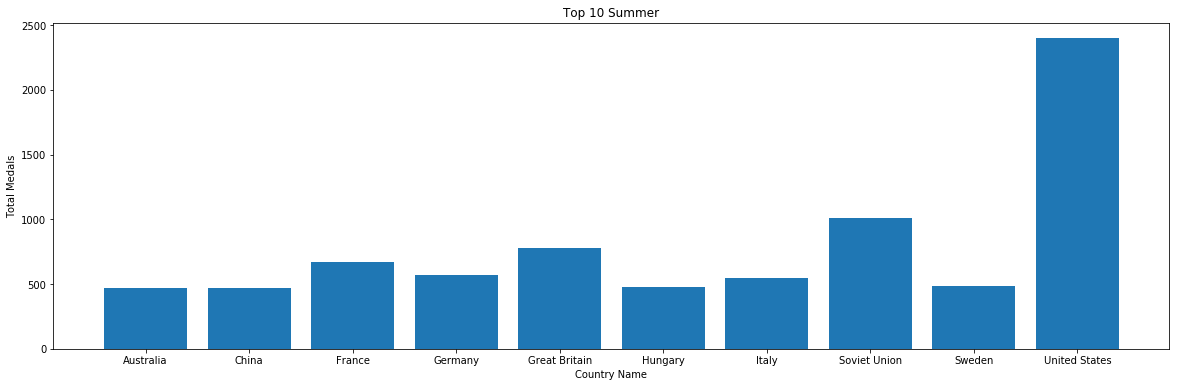

In [13]:
summer_df= data[data['Country_Name'].isin(top_10_summer)]
plt.figure(figsize=(20, 6))
plt.bar(summer_df['Country_Name'], summer_df['Total_Summer'])
plt.title('Top 10 Summer')
plt.xlabel('Country Name')
plt.ylabel('Total Medals')

Text(0, 0.5, 'Total Medals')

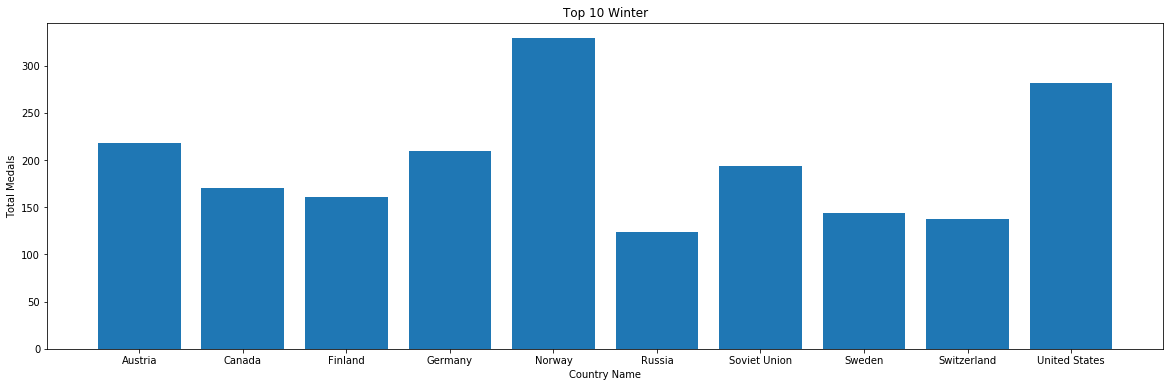

In [14]:
winter_df=data[data['Country_Name'].isin(top_10_winter)]
plt.figure(figsize=(20, 6))
plt.bar(winter_df['Country_Name'], winter_df['Total_Winter'])
plt.title('Top 10 Winter')
plt.xlabel('Country Name')
plt.ylabel('Total Medals')

Text(0, 0.5, 'Total Medals')

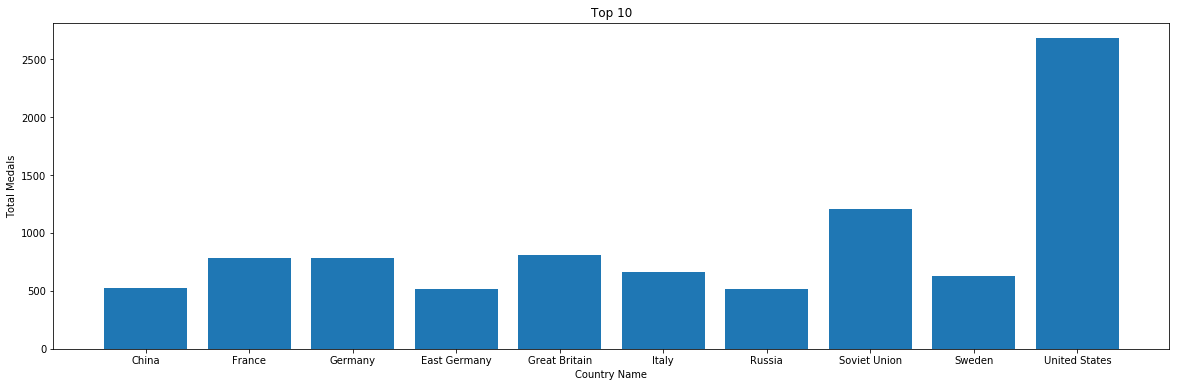

In [15]:
top_df=data[data['Country_Name'].isin(top_10)]
plt.figure(figsize=(20, 6))
plt.bar(top_df['Country_Name'], top_df['Total_Medals'])
plt.title('Top 10')
plt.xlabel('Country Name')
plt.ylabel('Total Medals')

# Top performing country(Gold)

In [28]:
summer_df['Golden_Ratio']=summer_df['Gold_Summer']/summer_df['Total_Summer']
summer_max_ratio=max(summer_df['Golden_Ratio'])
summer_country_gold=summer_df.loc[summer_df['Golden_Ratio'].idxmax(),'Country_Name']
print("Top Summer Country:", summer_country_gold, " with a ratio of %.2f" %summer_max_ratio )

Top Summer Country: China  with a ratio of 0.42


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
winter_df['Golden_Ratio']=winter_df['Gold_Winter']/winter_df['Total_Winter']
winter_max_ratio=max(winter_df['Golden_Ratio'])
winter_country_gold=winter_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']
print("Top Winter Country:", winter_country_gold, " with a ratio of %.2f" %winter_max_ratio )

Top Winter Country: Soviet Union  with a ratio of 0.40


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:

top_df['Golden_Ratio']=top_df['Gold_Total']/top_df['Total_Medals']
top_max_ratio=max(top_df['Golden_Ratio'])
top_country_gold=top_df.loc[top_df['Golden_Ratio'].idxmax(),'Country_Name']
print("Top Country:", top_country_gold, " with a ratio of %.2f" %top_max_ratio )

Top Country: China  with a ratio of 0.40


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
#Best in the world

In [21]:
data_1=data[:-1]
data_1['Total_Points']= data_1['Gold_Total']*3 + data_1['Silver_Total']*2 + data_1['Bronze_Total']*1  
most_points=max(data_1['Total_Points'])
best_country=data_1.loc[data_1['Total_Points'].idxmax(),'Country_Name']
print('The maximum points achieved is ', most_points, ' by ', best_country )

The maximum points achieved is  5684  by  United States


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
